# Test `fviz_`


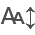

In [1]:
#disable warnings
from warnings import simplefilter, filterwarnings
simplefilter(action='ignore', category=FutureWarning)
filterwarnings("ignore")
#interactive notebook
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

In [3]:
from scientisttools import PCA
#instanciation
res_pca = PCA(ind_sup=(41,42,43,44,45),quanti_sup=(10,11),quali_sup=12,rotate=None)
res_pca.fit(decathlon)

PCA(ind_sup=(41, 42, 43, 44, 45), quali_sup=12, quanti_sup=(10, 11),
    rotate=None)

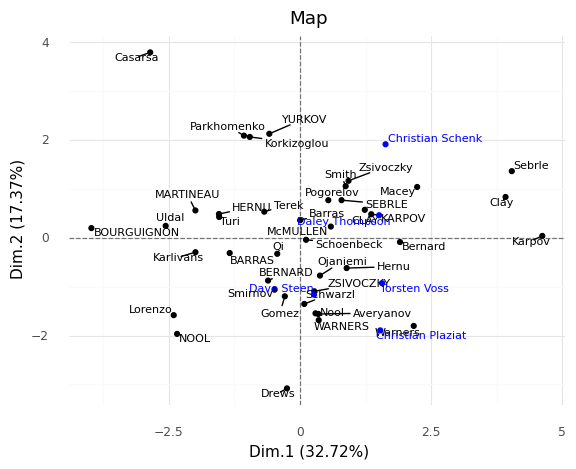

In [4]:
from scientisttools import fviz_scatter, add_scatter, set_axis
from plotnine import ggplot, aes, geom_hline,theme_minimal
p = fviz_scatter(res_pca,element="ind",repel=True)+theme_minimal()
p = add_scatter(p=p,data=res_pca.ind_sup_.coord,geom=("text","point"),text_args=dict(size=8),repel=True)
p = set_axis(p=p,self=res_pca)
print(p)

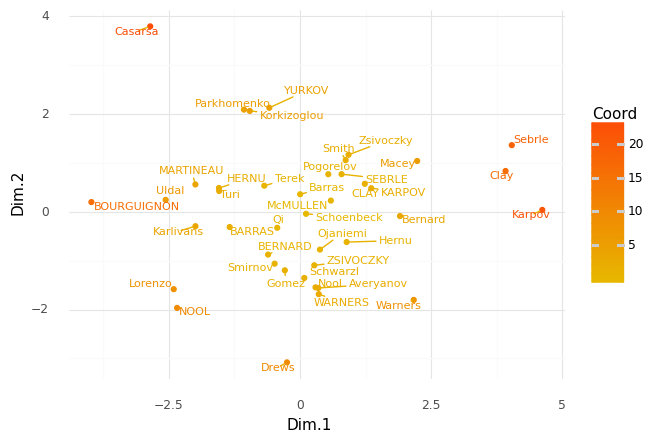

In [5]:
p = fviz_scatter(res_pca,element="ind",color="coord",repel=True)+theme_minimal()
print(p)

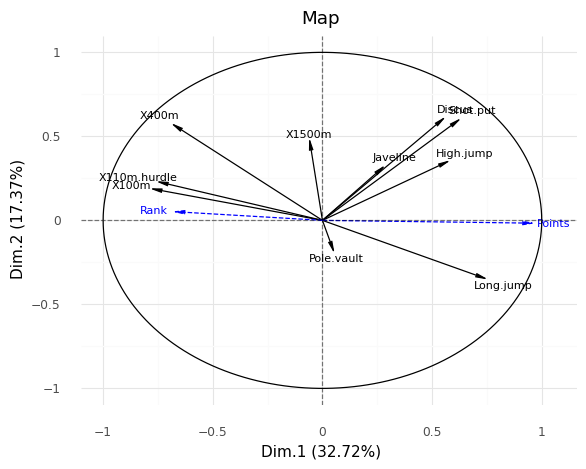

In [6]:
from scientisttools import fviz_arrow, add_arrow,fviz_circle
from plotnine import ggplot, aes, geom_hline,theme_minimal
p = fviz_arrow(res_pca,element="var",repel=True)+theme_minimal()
p = add_arrow(p=p,data=res_pca.quanti_sup_.coord,geom=("arrow","text"),text_args=dict(size=8),repel=True)
p = fviz_circle(p=p)
p = set_axis(p=p,self=res_pca)
print(p)

In [7]:
#radial shift function
from numpy import cos,sqrt,arctan2,sin
def rshift(r,theta,a=0.03,b=0.07):
    return r + a + b*abs(cos(theta))
coord = res_pca.var_.coord.iloc[:,:2]
coord = coord.assign(r = lambda x : sqrt(x["Dim.1"]**2+x["Dim.2"]**2),
                     theta = lambda x : arctan2(x["Dim.2"],x["Dim.1"]),
                     rnew = lambda x : rshift(r=x["r"],theta=x["theta"]),
                     xnew = lambda x : x["rnew"]*cos(x["theta"]),
                     ynew = lambda x : x["rnew"]*sin(x["theta"]))
coord

Loading ITables v2.4.4 from the init_notebook_mode cell... (need help?)
